<a href="https://colab.research.google.com/github/Arkasom/Machine_Learning_Works/blob/main/Task_1_Level_3_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK-1(Level-3(Advanced))

#Description: Implement a Random Forest model for classification on a complex dataset.

# Objectives

* Train a Random Forest model and tune hyperparameters (e.g., number of trees, max depth).
* Evaluate the model using cross-validation and classification metrics (precision, recall, F1-score).
* Perform feature importance analysis to identify the most important features in the dataset.
* Tools: Python, scikit-learn, pandas, matplotlib.

# importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('churn-bigml-80.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.shape

(2666, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#sns.set_theme(style="darkgrid",palette='dark',context='notebook')

# pair plot for visualization of all Columns

In [ ]:
# sns.pairplot(df,hue='Churn')

# Preprocessing

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number,bool]).columns.tolist()

In [ ]:
target_col = df['Churn']

In [ ]:
for col in categorical_cols:
  print(df[col].nunique())

51
2
2


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
  if df[col].nunique() == 2:
    df[col] = le.fit_transform(df[col])
  else:
    df = pd.get_dummies(df,columns=[col],drop_first=True)

In [ ]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,False,False,False,False,False,False,False,False,False,False
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,False,False,False,False,False,False,False,False,False,False
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,False,False,False,False,False,False,False,False,False,False
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,False,False,False,False,False,False,False,False,False,False
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df.drop('Churn',axis=1)
y = df['Churn']

# Splitting the dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

# Importing the RandomForest Classifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

# Hyperparameter Tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

# best parameters found and the corresponding F1 score

In [ ]:
# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best F1-score found: ", grid_search.best_score_)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1-score found:  0.7206646052360337


In [ ]:
best_rf = grid_search.best_estimator_

# Evaluation of the Model

In [ ]:
y_pred = best_rf.predict(X_test)

# Importing cross_val_score and important metrices

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       False       0.94      1.00      0.97       456
        True       1.00      0.62      0.76        78

    accuracy                           0.94       534
   macro avg       0.97      0.81      0.87       534
weighted avg       0.95      0.94      0.94       534



In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[456   0]
 [ 30  48]]


In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9438202247191011


In [ ]:
cross_val = cross_val_score(best_rf,X,y,cv=5,scoring='f1')
print(cross_val)

[0.72       0.68852459 0.76923077 0.74193548 0.77165354]


In [ ]:
feature_importances = best_rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Visualization of important features

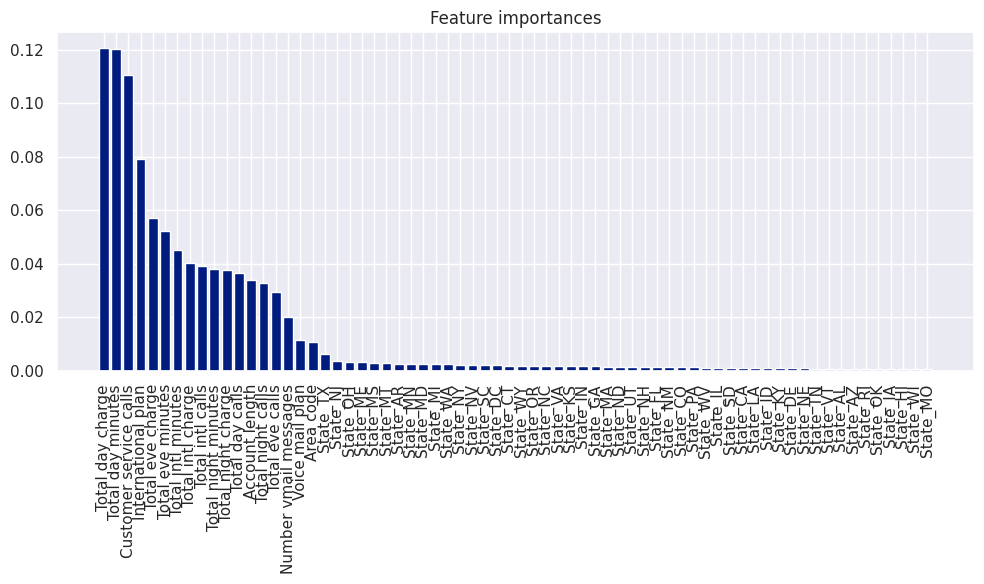

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Printing the important features

In [ ]:
# Create a pandas Series with feature importances and feature names
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print the sorted feature importances
print(sorted_feature_importances)

Total day charge          0.120419
Total day minutes         0.120179
Customer service calls    0.110511
International plan        0.078961
Total eve charge          0.057247
                            ...   
State_OK                  0.000712
State_IA                  0.000646
State_HI                  0.000644
State_WI                  0.000600
State_MO                  0.000554
Length: 68, dtype: float64
